In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import pandas as pd
import csv
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from nltk.corpus import stopwords
import numpy as np
import nltk
from nltk import ngrams

In [3]:
df = pd.read_csv('/content/drive/MyDrive/nlp_project/data/anek_preprocessed.csv')

In [4]:
df

,text,text_preprocessed,text_withoutStops
0,"Друзья мои, чтобы соответствовать вам, я готов...",друзья мои чтобы соответствовать вам я готов с...,друзья мои соответствовать готов сделать собой...
1,"- А вот скажи честно, ты во сне храпишь?- Поня...",а вот скажи честно ты во сне храпишь понятие ...,скажи честно сне храпишь понятие имею вроде со...
2,"Поссорилась с мужем. Пока он спал, я мысленно ...",поссорилась с мужем пока он спал я мысленно ра...,поссорилась мужем пока спал мысленно развелась...
3,Если тебя посещают мысли о смерти - это еще по...,если тебя посещают мысли о смерти это еще пол...,посещают мысли смерти это полбеды беда это сме...
4,"Все мне говорили, что у меня ничего не получит...",все мне говорили что у меня ничего не получитс...,говорили получится сдался доказал правы
...,...,...,...
122081,Последним раскрытым громким преступлением в Ки...,последним раскрытым громким преступлением в ки...,последним раскрытым громким преступлением киев...
122082,Если бесконечное количество российских футболи...,если бесконечное количество российских футболи...,бесконечное количество российских футболистов ...
122083,На чемпионат мира по футболу от России нужно Ю...,на чемпионат мира по футболу от россии нужно ю...,чемпионат мира футболу россии нужно юлию самой...
122084,В целях профилактики от всего весной следует е...,в целях профилактики от всего весной следует е...,целях профилактики весной следует чеснока женщ...


In [5]:
data = pd.DataFrame(df['text_withoutStops'])
data.head(5)

,text_withoutStops
0,друзья мои соответствовать готов сделать собой...
1,скажи честно сне храпишь понятие имею вроде со...
2,поссорилась мужем пока спал мысленно развелась...
3,посещают мысли смерти это полбеды беда это сме...
4,говорили получится сдался доказал правы


In [15]:
!pip install natasha

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=87751e43917dde48315efaeb413c9ecd19d46e29a4055c38dd05b78323dc8980
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [16]:
from razdel import tokenize, sentenize
text = str(data.iloc[0,0])
tokens = list(tokenize(text))
sents = list(sentenize(text))
tokens

[Substring(0, 6, 'друзья'),
 Substring(7, 10, 'мои'),
 Substring(11, 26, 'соответствовать'),
 Substring(27, 32, 'готов'),
 Substring(33, 40, 'сделать'),
 Substring(41, 46, 'собой'),
 Substring(47, 53, 'усилие'),
 Substring(54, 59, 'стать'),
 Substring(60, 67, 'станьте'),
 Substring(68, 75, 'немного'),
 Substring(76, 80, 'хуже')]

In [17]:
from natasha import MorphVocab, Doc
from natasha import Segmenter
from natasha import NewsMorphTagger
from natasha import NewsEmbedding

morph_vocab = MorphVocab()
doc = Doc(text)
doc.segment(Segmenter())
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
doc.tag_morph(morph_tagger)

for token in doc.tokens:
    print(token.text, token.pos, token.feats)

друзья NOUN {'Animacy': 'Anim', 'Case': 'Nom', 'Gender': 'Masc', 'Number': 'Plur'}
мои DET {'Animacy': 'Inan', 'Case': 'Acc', 'Number': 'Plur'}
соответствовать VERB {'Aspect': 'Imp', 'VerbForm': 'Inf', 'Voice': 'Act'}
готов ADJ {'Degree': 'Pos', 'Gender': 'Masc', 'Number': 'Sing', 'Variant': 'Short'}
сделать VERB {'Aspect': 'Perf', 'VerbForm': 'Inf', 'Voice': 'Act'}
собой PRON {'Case': 'Ins'}
усилие NOUN {'Animacy': 'Inan', 'Case': 'Acc', 'Gender': 'Neut', 'Number': 'Sing'}
стать VERB {'Aspect': 'Perf', 'VerbForm': 'Inf', 'Voice': 'Act'}
станьте NOUN {'Animacy': 'Inan', 'Case': 'Ins', 'Gender': 'Masc', 'Number': 'Sing'}
немного ADV {'Degree': 'Pos'}
хуже ADV {'Degree': 'Cmp'}


In [18]:
for token in doc.tokens:
    token.lemmatize(morph_vocab)
    print(token.text, "-", token.lemma)

друзья - друг
мои - мой
соответствовать - соответствовать
готов - готовый
сделать - сделать
собой - себя
усилие - усилие
стать - стать
станьте - станьте
немного - немного
хуже - плохой


In [19]:
from sklearn.base import BaseEstimator

def lemmatize_sentence(text: str) -> str:
    lemmatized_str = ''
    morph_vocab = MorphVocab()
    doc = Doc(text)
    doc.segment(Segmenter())
    emb = NewsEmbedding()
    morph_vocab = MorphVocab()
    doc.tag_morph(morph_tagger)
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
        lemmatized_str += str(token.lemma)
        lemmatized_str += ' '
    return lemmatized_str

class LemmatizerRus(BaseEstimator):
    """
    Класс для лемматизации на русском языке с помощью natasha - разбиваем по словам и применяем к каждому лемматизацию
    """

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        return np.array(list(map(lambda x: ''.join(lemmatize_sentence(x)), x)))

In [20]:
lemmatize_sentence('других умею нифига классная')

'другой уметь нифига классный '

In [ ]:
LemmatizerRus().transform(['первая тексты', 'вторую текстов'])

array(['первый текст ', 'второй текст '], dtype='<U13')

In [6]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=5fb7973b4ea98392c36159539c592abd26ba2f8224afd624ebc10b48c32b9a7b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [12]:
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
from sklearn.base import BaseEstimator

def lemmatize_sentence_pymorphy2(text: str) -> str:
  parser = MorphAnalyzer()
  tokenized_text = word_tokenize(text)
  lemmatized_text = ' '.join([parser.parse(word)[0].normal_form for word in tokenized_text])
  return lemmatized_text

class LemmatizerRus_pymorphy2(BaseEstimator):
    """
    Класс для лемматизации на русском языке с помощью pymorphy2 - разбиваем по словам и применяем к каждому лемматизацию
    """

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        return np.array(list(map(lambda x: ''.join(lemmatize_sentence_pymorphy2(x)), x)))

In [23]:
dfs = []

n = 5000

num_parts = (len(data) // n) + (1 if len(data) % n else 0)

for i in range(num_parts):
    start_idx = i * n
    end_idx = start_idx + n
    dfs.append(data.iloc[start_idx:end_idx])

In [30]:
!pip install tqdm

In [39]:
dfs_updated = dfs[5:]

In [45]:
from tqdm import tqdm
counter = 5

for dataframe in tqdm(dfs_updated, desc="Processing DataFrames"):
  dataframe = dataframe.dropna()
  dataframe['text_lemmatized_pymorphy2'] = LemmatizerRus_pymorphy2().transform(dataframe['text_withoutStops'])
  dataframe.to_csv(f'/content/drive/MyDrive/nlp_project/data/anek_lemmatized_{counter}.csv', index = False)
  counter += 1

Processing DataFrames:   0%|          | 0/20 [00:00<?, ?it/s]<ipython-input-45-518ab792035f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['text_lemmatized_pymorphy2'] = LemmatizerRus_pymorphy2().transform(dataframe['text_withoutStops'])
Processing DataFrames:  25%|██▌       | 5/20 [1:00:22<3:00:57, 723.86s/it]<ipython-input-45-518ab792035f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['text_lemmatized_pymorphy2'] = LemmatizerRus_pymorphy2().transform(dataframe['text_withoutStops'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122086 entries, 0 to 122085
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   text_withoutStops  122081 non-null  object
dtypes: object(1)
memory usage: 953.9+ KB


In [5]:
dir_path = '/content/drive/MyDrive/nlp_project/data'

In [6]:
import os
content = os.listdir(dir_path)
content

['anek.csv',
 'anek_raw.txt',
 'anek_preprocessed.csv',
 'anek_lemmatized_0.csv',
 'anek_lemmatized_1.csv',
 'anek_lemmatized_2.csv',
 'anek_lemmatized_3.csv',
 'anek_lemmatized_4.csv',
 'anek_lemmatized_5.csv',
 'anek_lemmatized_6.csv',
 'anek_lemmatized_7.csv',
 'anek_lemmatized_8.csv',
 'anek_lemmatized_9.csv',
 'anek_lemmatized_10.csv',
 'anek_lemmatized_11.csv',
 'anek_lemmatized_12.csv',
 'anek_lemmatized_13.csv',
 'anek_lemmatized_14.csv',
 'anek_lemmatized_15.csv',
 'anek_lemmatized_16.csv',
 'anek_lemmatized_17.csv',
 'anek_lemmatized_18.csv',
 'anek_lemmatized_19.csv',
 'anek_lemmatized_20.csv',
 'anek_lemmatized_21.csv',
 'anek_lemmatized_22.csv',
 'anek_lemmatized_23.csv',
 'anek_lemmatized_24.csv']

In [15]:
csvs = []
for n in range(0,25):
  file = f'/content/drive/MyDrive/nlp_project/data/anek_lemmatized_{n}.csv'
  csvs.append(file)

In [16]:
df = pd.concat(
    map(pd.read_csv, csvs), ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122081 entries, 0 to 122080
Data columns (total 2 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   text_withoutStops          122081 non-null  object
 1   text_lemmatized_pymorphy2  122081 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [18]:
df

,text_withoutStops,text_lemmatized_pymorphy2
0,друзья мои соответствовать готов сделать собой...,друг мой соответствовать готовый сделать себя ...
1,скажи честно сне храпишь понятие имею вроде со...,сказать честно сон храпеть понятие иметь вроде...
2,поссорилась мужем пока спал мысленно развелась...,поссориться муж пока спасть мысленно развестис...
3,посещают мысли смерти это полбеды беда это сме...,посещать мысль смерть это полбеды беда это сме...
4,говорили получится сдался доказал правы,говорить получиться сдаться доказать правый
...,...,...
122076,последним раскрытым громким преступлением киев...,последний раскрытый громкий преступление киев ...
122077,бесконечное количество российских футболистов ...,бесконечный количество российский футболист за...
122078,чемпионат мира футболу россии нужно юлию самой...,чемпионат мир футбол россия нужно юлий самойло...
122079,целях профилактики весной следует чеснока женщ...,цель профилактика весна следовать чеснок женщи...


In [22]:
df['text_lemmatized_pymorphy2'].to_csv('anek_lemmatized.csv' ,index = False)

In [30]:
def delete_digits_text(text: str) -> str:
    """
    Функция для удаления чисел из текста
    """
    return re.sub(r'[0-9]+', '', text).lower()

In [31]:
delete_digits_text("5hello1100")

'hello'

In [32]:
df['result'] = df['text_lemmatized_pymorphy2'].apply(delete_digits_text)

In [37]:
df.iloc[10000,2]

'весь косметика одинаково полезный особенно вредный здоровье помада рубашка'

In [38]:
df

,text_withoutStops,text_lemmatized_pymorphy2,result
0,друзья мои соответствовать готов сделать собой...,друг мой соответствовать готовый сделать себя ...,друг мой соответствовать готовый сделать себя ...
1,скажи честно сне храпишь понятие имею вроде со...,сказать честно сон храпеть понятие иметь вроде...,сказать честно сон храпеть понятие иметь вроде...
2,поссорилась мужем пока спал мысленно развелась...,поссориться муж пока спасть мысленно развестис...,поссориться муж пока спасть мысленно развестис...
3,посещают мысли смерти это полбеды беда это сме...,посещать мысль смерть это полбеды беда это сме...,посещать мысль смерть это полбеды беда это сме...
4,говорили получится сдался доказал правы,говорить получиться сдаться доказать правый,говорить получиться сдаться доказать правый
...,...,...,...
122076,последним раскрытым громким преступлением киев...,последний раскрытый громкий преступление киев ...,последний раскрытый громкий преступление киев ...
122077,бесконечное количество российских футболистов ...,бесконечный количество российский футболист за...,бесконечный количество российский футболист за...
122078,чемпионат мира футболу россии нужно юлию самой...,чемпионат мир футбол россия нужно юлий самойло...,чемпионат мир футбол россия нужно юлий самойло...
122079,целях профилактики весной следует чеснока женщ...,цель профилактика весна следовать чеснок женщи...,цель профилактика весна следовать чеснок женщи...


In [39]:
df['result'].to_csv('result.csv' ,index = False)

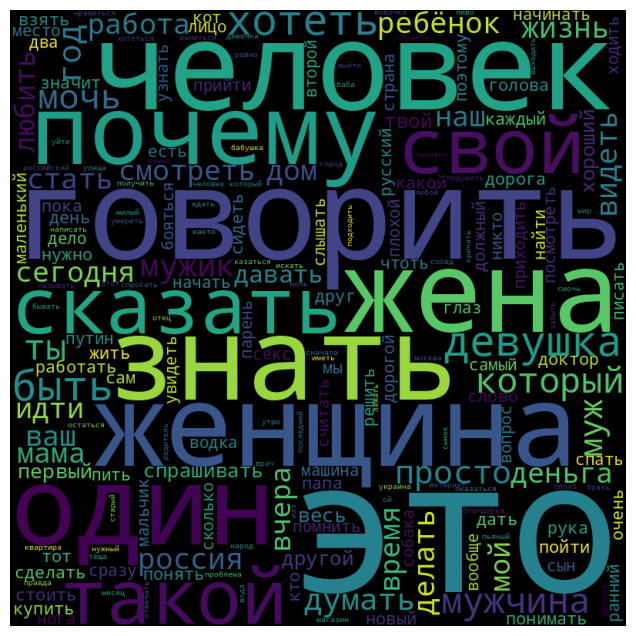

In [41]:
result_words = ' '.join(df['result'].astype('str'))
wordcloud = WordCloud(width = 800, height = 800).generate(result_words)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()